# Compreensão do Modelo e Problema de Negócio

**Compreensão do Negócio**

O Banco Elegance, renomado por seus serviços premium e exclusivos, está enfrentando um desafio preocupante com o aumento no número de clientes que desejam encerrar suas contas bancárias. O Gerente Geral, Sr. Fernando, tem liderado o banco com grande sucesso, mantendo altos padrões de atendimento ao cliente. Entretanto, ele está profundamente perturbado ao perceber que um número crescente de clientes de alto valor está solicitando o encerramento de suas contas no Banco Elegance.

A dor de Sr. Fernando é ainda mais acentuada pelo fato de que esses clientes de alto valor têm sido fundamentais para o banco, contribuindo significativamente para sua reputação e receita. O Banco Elegance sempre se destacou por fornecer serviços de classe mundial e soluções financeiras personalizadas para seus clientes mais valiosos. Sr. Fernando acredita que, se eles pudessem prever antecipadamente quais desses clientes estão considerando encerrar suas contas, poderiam tomar medidas proativas para reter esses clientes valioso cancárias.


**Problema de Negócio**


O Banco Elegance deseja desenvolver um sistema de previsão que identifique com antecedência os clientes propensos a encerrar suas contas bancárias. Isso permitirá que o banco adote medidas proativas para reter esses clientes, oferecendo soluções personalizadas, benefícios adicionais e um atendimento excepcional. O objetivo é evitar que os clientes de alto valor deixem o banco, mantendo sua lealdade e protegendo a reputação do Banco Elegance no setor financeiro.

O conjunto de dados fornecido inclui informações detalhadas sobre idade, renda, estado civil, histórico de transações, produtos bancários adicionais utilizados e outros indicadores relevantes. O desafio é treinar um modelo de aprendizado de máquina que possa prever quais clientes estão mais propensos a encerrar suas contas no futuro, permitindo que o banco tome ações preventivas e ofereça um serviço excepcional de retenção de clientes.

# Importações e Bibliotecas

In [31]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from IPython.display import Image
from matplotlib import pyplot as plt

In [32]:
# Configurações de Layout
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = (25,12)
    plt.rcParams['font.size'] = 24
    
    #display( HTML('<style>.container {width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

# 1.0 Compreensão dos Dados

In [2]:
df_1 = pd.read_csv('data/BankChurners.csv').drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# Exibição
df_1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df_1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**CLIENTNUM:** Número do cliente. Identificador único para o cliente que possui a conta.

**Attrition_Flag:** Variável de evento interno (atividade do cliente) - se a conta estiver fechada, então 1, senão 0.

**Customer_Age:** Idade do cliente

**Gender:** Gênero do cliente em que M é sexo masculino e F é sexo feminino

**Dependent_count:** Número de dependentes.

**Educational_Level:** Qualificação educacional do titular da conta.

**Marital Status:** Estado Matrimonial do cliente.

**Income_category:** Categoria de renda anual do titular da conta.

**Card_Category:** Variável do produto - Tipo de Cartão (Azul, Prata, Ouro, Platina).

**Months_of_book:** Período de relacionamento com o banco.(Meses)

**Total_Relationship_Count:** Número total de produtos detidos pelo cliente.

**Month_Inactive_12_mon:** Número de meses inativos nos últimos 12 meses.

**Contacts_Count_12_mon:** Número de contatos nos últimos 12 meses.

**Credit_Limit:** Limite de crédito no cartão de crédito.

**Total_Revolving_Bal:** Saldo total em rotação no cartão de crédito.

**Avg_Open_To_Buy**: Linha de crédito disponível (média dos últimos 12 meses).

**Total_Amt_Chng_Q4_Q1:** Mudança no valor da transação (4º trimestre em relação ao 1º trimestre).

**Total_Trans_Amt:** Valor total da transação (últimos 12 meses).

**Total_Trans_Ct:** Total de contagem de transações (últimos 12 meses).

**Total_Ct_Chng_Q4_Q1:** Mudança na contagem de transações (4º trimestre em relação ao 1º trimestre).

**Avg_Utilization_Ratio:** Taxa média de utilização do cartão.


# 2.0 Preparação dos Dados 

## 2.1 Renomear as Colunas

In [4]:
# Carregando os dados
df_2 = df_1.copy()

# Reorganizando as colunas
df_2 = df_2[['CLIENTNUM', 'Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Dependent_count',
             'Income_Category', 'Card_Category', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy' , 'Avg_Utilization_Ratio',
             'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct', 'Total_Trans_Amt',
             'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag']]

# Renomear as Colunas
df_2.columns = ['id_cliente', 'idade_cliente', 'genero', 'nivel_educacional', 'estado_civil', 'num_dependentes',  
                'ctg_renda_anual', 'ctg_cartao_credito', 'limite_credito_cartao', 'sld_tot_rotativo_cartao', 'credito_disponivel_media_12_meses',
                'taxa_media_utilizacao_cartao', 'meses_relacionamento', 'num_produtos_detidos', 'meses_inativos_ultimo_12_meses', 
                'num_contatos_ultimo_12_meses', 'tot_cont_transacoes_ultimo_12_meses', 'vlr_tot_transacoes_ultimo_12_meses',
                'dif_vlr_transacao_t4_t1', 'dif_cont_transacao_t4_t1', 'conta_encerrada']

# Exibição
df_2.head()

,id_cliente,idade_cliente,genero,nivel_educacional,estado_civil,num_dependentes,ctg_renda_anual,ctg_cartao_credito,limite_credito_cartao,sld_tot_rotativo_cartao,...,taxa_media_utilizacao_cartao,meses_relacionamento,num_produtos_detidos,meses_inativos_ultimo_12_meses,num_contatos_ultimo_12_meses,tot_cont_transacoes_ultimo_12_meses,vlr_tot_transacoes_ultimo_12_meses,dif_vlr_transacao_t4_t1,dif_cont_transacao_t4_t1,conta_encerrada
0,768805383,45,M,High School,Married,3,$60K - $80K,Blue,12691.0,777,...,0.061,39,5,1,3,42,1144,1.335,1.625,Existing Customer
1,818770008,49,F,Graduate,Single,5,Less than $40K,Blue,8256.0,864,...,0.105,44,6,1,2,33,1291,1.541,3.714,Existing Customer
2,713982108,51,M,Graduate,Married,3,$80K - $120K,Blue,3418.0,0,...,0.000,36,4,1,0,20,1887,2.594,2.333,Existing Customer
3,769911858,40,F,High School,Unknown,4,Less than $40K,Blue,3313.0,2517,...,0.760,34,3,4,1,20,1171,1.405,2.333,Existing Customer
4,709106358,40,M,Uneducated,Married,3,$60K - $80K,Blue,4716.0,0,...,0.000,21,5,1,0,28,816,2.175,2.500,Existing Customer


## 2.2 Dimensão dos Dados

In [5]:
# Quantidade de Dados
print(f'Quantidade de Linhas: {df_2.shape[0]}')
print(f'Quantidade de Colunas: {df_2.shape[1]}')

Quantidade de Linhas: 10127
Quantidade de Colunas: 21


## 2.3 Quantidade de Valores Nulos

In [6]:
# Verificação de Dados Nulos
df_2.isna().sum()

id_cliente                             0
idade_cliente                          0
genero                                 0
nivel_educacional                      0
estado_civil                           0
num_dependentes                        0
ctg_renda_anual                        0
ctg_cartao_credito                     0
limite_credito_cartao                  0
sld_tot_rotativo_cartao                0
credito_disponivel_media_12_meses      0
taxa_media_utilizacao_cartao           0
meses_relacionamento                   0
num_produtos_detidos                   0
meses_inativos_ultimo_12_meses         0
num_contatos_ultimo_12_meses           0
tot_cont_transacoes_ultimo_12_meses    0
vlr_tot_transacoes_ultimo_12_meses     0
dif_vlr_transacao_t4_t1                0
dif_cont_transacao_t4_t1               0
conta_encerrada                        0
dtype: int64

## 2.4 Tratamento e Limpeza dos Dados

In [7]:
# Atributo: Id Cliente
df_2['id_cliente'] = df_2['id_cliente'].astype(str)

# Atributo: Genero
df_2['genero'] = df_2['genero'].apply(lambda x: x.upper())

# Atributo: Nivel Educacional
df_2['nivel_educacional'] = df_2['nivel_educacional'].apply(lambda x: x.replace(' ', '').upper().replace('-', ''))

# Atributo: Estado Civil
df_2['estado_civil'] = df_2['estado_civil'].apply(lambda x: x.upper())

# Atributo: Categoria Renda Anual
df_2['ctg_renda_anual'] = df_2['ctg_renda_anual'].apply(lambda x: x.replace('$', '').upper() if x != '$120K +' else 'MORE THAN 120K')

# Atributo: Categoria Cartao de Credito
df_2['ctg_cartao_credito'] = df_2['ctg_cartao_credito'].apply(lambda x: x.upper())

# Atributo: Limite Cartão de Crédito
df_2['limite_credito_cartao'] = df_2['limite_credito_cartao'].apply(lambda x: round(x))

# Atributo: Media de Crédito Disponível nos Últimos 12 meses
df_2['credito_disponivel_media_12_meses'] = df_2['credito_disponivel_media_12_meses'].apply(lambda x: round(x))

# Atributo: Conta Encerrada
df_2['conta_encerrada'] = df_2['conta_encerrada'].apply(lambda x: x.upper())

## 2.5 Estatística Descritiva

In [8]:
# Estatísticas Variáveis Numéricas
df_2_numerical = df_2.select_dtypes(include=['int64','float64'])
df_2_numerical.describe()

,idade_cliente,num_dependentes,limite_credito_cartao,sld_tot_rotativo_cartao,credito_disponivel_media_12_meses,taxa_media_utilizacao_cartao,meses_relacionamento,num_produtos_detidos,meses_inativos_ultimo_12_meses,num_contatos_ultimo_12_meses,tot_cont_transacoes_ultimo_12_meses,vlr_tot_transacoes_ultimo_12_meses,dif_vlr_transacao_t4_t1,dif_cont_transacao_t4_t1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,8631.938679,1162.814061,7469.124617,0.274894,35.928409,3.812580,2.341167,2.455317,64.858695,4404.086304,0.759941,0.712222
std,8.016814,1.298908,9088.788539,814.987335,9090.695763,0.275691,7.986416,1.554408,1.010622,1.106225,23.472570,3397.129254,0.219207,0.238086
min,26.000000,0.000000,1438.000000,0.000000,3.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000,510.000000,0.000000,0.000000
25%,41.000000,1.000000,2555.000000,359.000000,1324.500000,0.023000,31.000000,3.000000,2.000000,2.000000,45.000000,2155.500000,0.631000,0.582000
50%,46.000000,2.000000,4549.000000,1276.000000,3474.000000,0.176000,36.000000,4.000000,2.000000,2.000000,67.000000,3899.000000,0.736000,0.702000
75%,52.000000,3.000000,11067.500000,1784.000000,9859.000000,0.503000,40.000000,5.000000,3.000000,3.000000,81.000000,4741.000000,0.859000,0.818000
max,73.000000,5.000000,34516.000000,2517.000000,34516.000000,0.999000,56.000000,6.000000,6.000000,6.000000,139.000000,18484.000000,3.397000,3.714000


In [9]:
# Estatísticas Variáveis Numéricas
df_2_categorical = df_2.select_dtypes(exclude=['int64','float64'])
df_2_categorical.describe()

,id_cliente,genero,nivel_educacional,estado_civil,ctg_renda_anual,ctg_cartao_credito,conta_encerrada
count,10127,10127,10127,10127,10127,10127,10127
unique,10127,2,7,4,6,4,2
top,768805383,F,GRADUATE,MARRIED,LESS THAN 40K,BLUE,EXISTING CUSTOMER
freq,1,5358,3128,4687,3561,9436,8500


**Resumo da Análise Descritiva**

No geral, todas as variáveis possuem um comportamento dentro do esperado. Claramente, possuímos alguns outliers, entretanto, são outliers que fazem sentido analisando o negócio em que estão inseridos.

# 3.0 Feature Engineering

In [14]:
df_3 = df_2.copy()

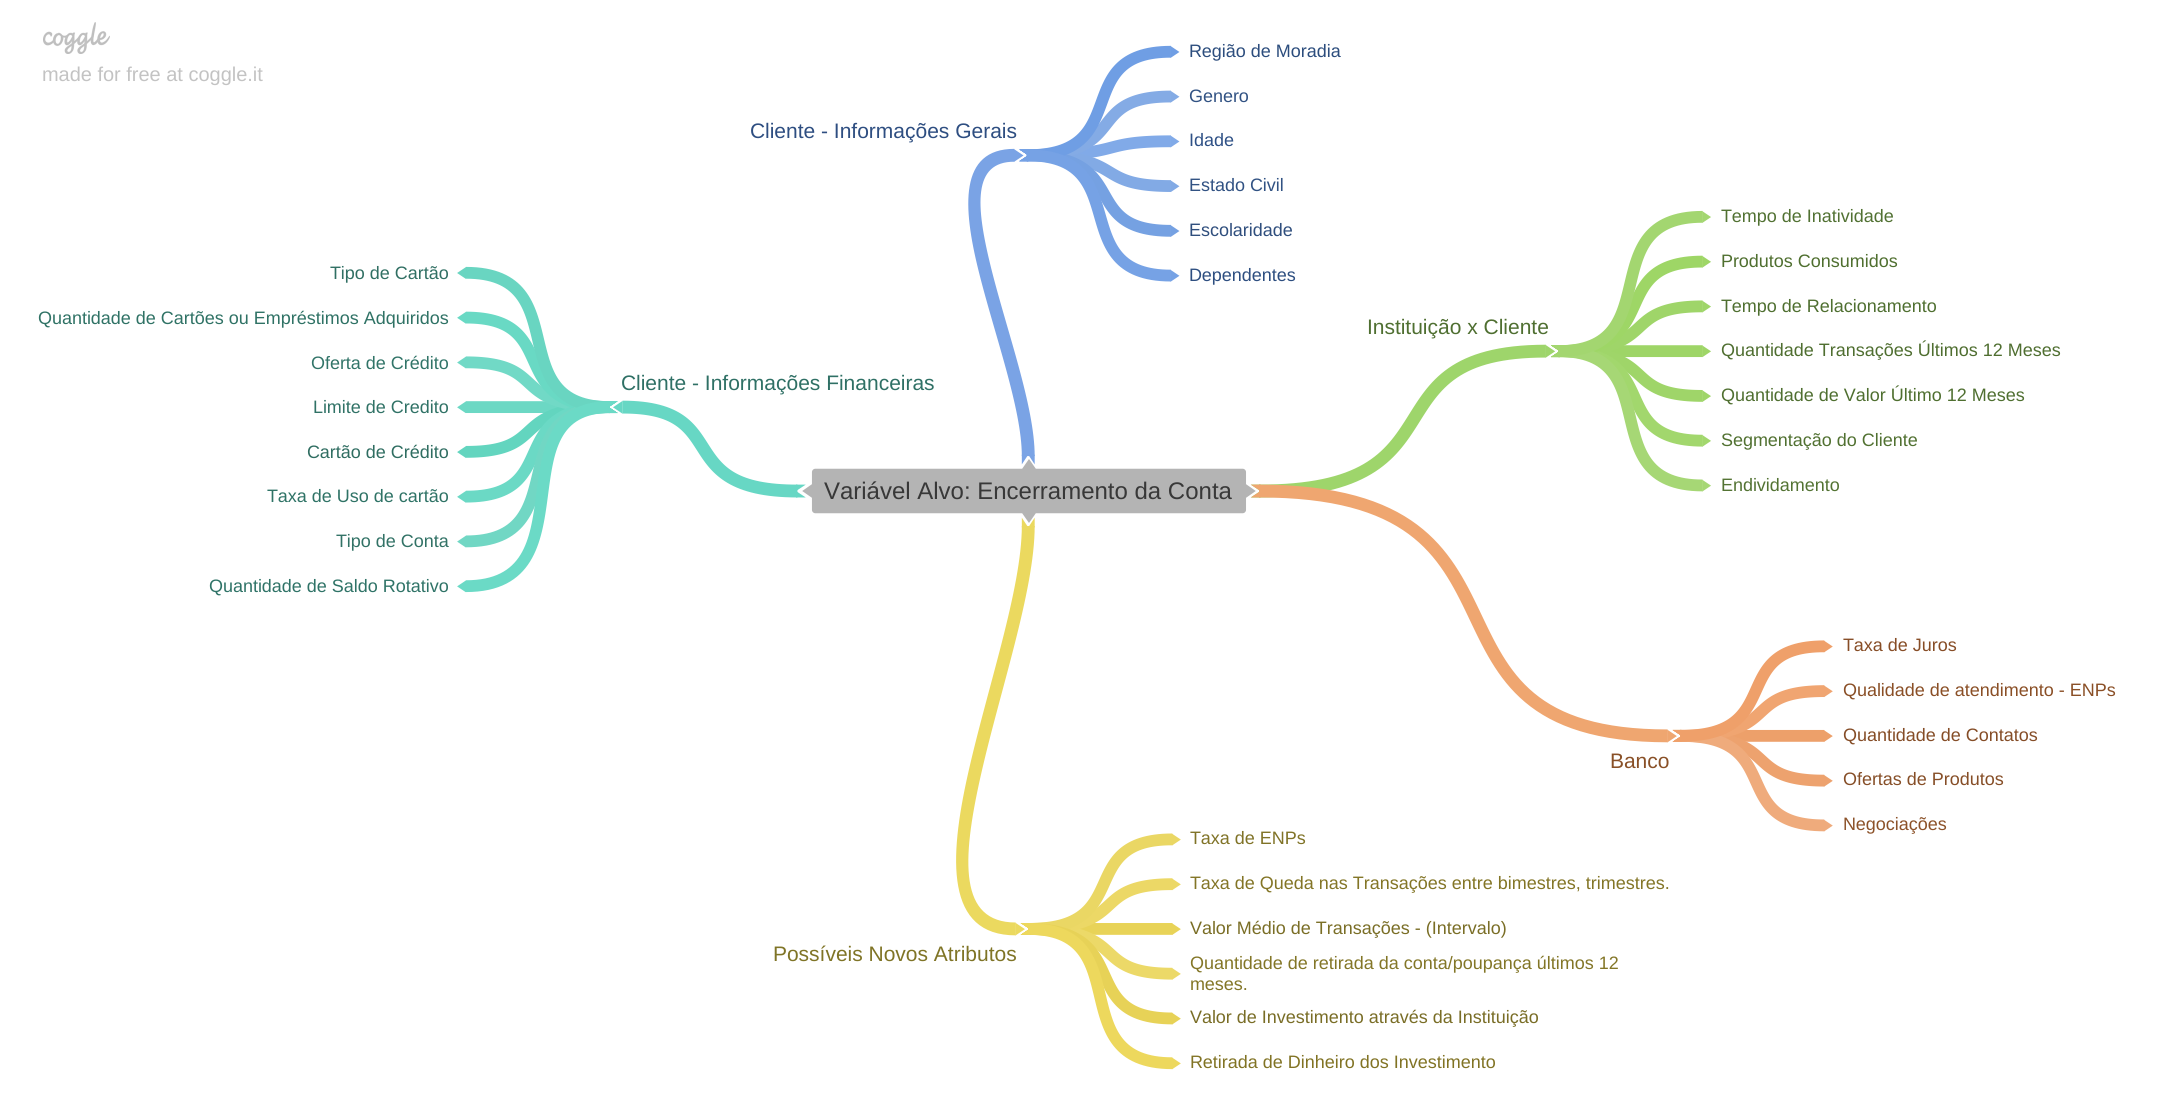

In [15]:
Image('images/feature_engineering.png')

**Hipóteses de Negócios - Informações Financeiras**

1. Clientes que possuem a taxa de uso de cartão menor que 0.5 encerram mais a conta.
2. Clientes que possuem cartões tipo Blue encerram mais a conta do que os outros cartões.
3. Clientes que tem um saldo rotativo maior que a média encerram menos a conta.
4. Clientes que possuem um limite de crédito abaixo da média(em relação aos últimos 12 meses), encerram mais a conta.
5. Clientes que possuem uma renda anual maior que 40k encerram mais a conta. 

**Hipóteses de Negócios -  Informações Gerais**

1. Clientes que são classificados como 'GRADUATE' encerram mais a conta.
2. Clientes do sexo feminino encerram mais a conta.
3. Clientes que são casados encerram menos a conta
4. Cliente com idade acima de 46 anos encerram mais a conta.

**Hipóteses de Negócios - Relacionamento BancoxCliente**

1. Clientes que tem mais de 36 meses de relacionamento com o banco, não encerram a conta.
2. Clientes que possuem mais de 2 meses de inatividade encerram mais a conta.
3. Clientes que possuem taxa de diferença de valor de transação abaixo de 0.5 entre o t4 e t1 encerram a conta.
4. Clientes que possuem a quantidade de transações nos últimos 12 meses acima de 65 encerram menos a conta.
5. Clientes que possuem uma valor de transação abaixo dos 4500 encerram mais a conta.

# 4.0 Análise Exploratória dos Dados

In [16]:
# Carregando os dados
df_4 = df_3.copy()

## 4.1 Análise Univariada

In [17]:
, 'nivel_educacional',
       'estado_civil', 'num_dependentes', 'ctg_renda_anual',
       'ctg_cartao_credito', 'limite_credito_cartao',
       'sld_tot_rotativo_cartao', 'credito_disponivel_media_12_meses',
       'taxa_media_utilizacao_cartao', 'meses_relacionamento',
       'num_produtos_detidos', 'meses_inativos_ultimo_12_meses',
       'num_contatos_ultimo_12_meses', 'tot_cont_transacoes_ultimo_12_meses',
       'vlr_tot_transacoes_ultimo_12_meses', 'dif_vlr_transacao_t4_t1',
       'dif_cont_transacao_t4_t1', 'conta_encerrada'],
      dtype='object')

Index(['id_cliente', 'idade_cliente', 'genero', 'nivel_educacional',
       'estado_civil', 'num_dependentes', 'ctg_renda_anual',
       'ctg_cartao_credito', 'limite_credito_cartao',
       'sld_tot_rotativo_cartao', 'credito_disponivel_media_12_meses',
       'taxa_media_utilizacao_cartao', 'meses_relacionamento',
       'num_produtos_detidos', 'meses_inativos_ultimo_12_meses',
       'num_contatos_ultimo_12_meses', 'tot_cont_transacoes_ultimo_12_meses',
       'vlr_tot_transacoes_ultimo_12_meses', 'dif_vlr_transacao_t4_t1',
       'dif_cont_transacao_t4_t1', 'conta_encerrada'],
      dtype='object')

**Atributo - idade_cliente**

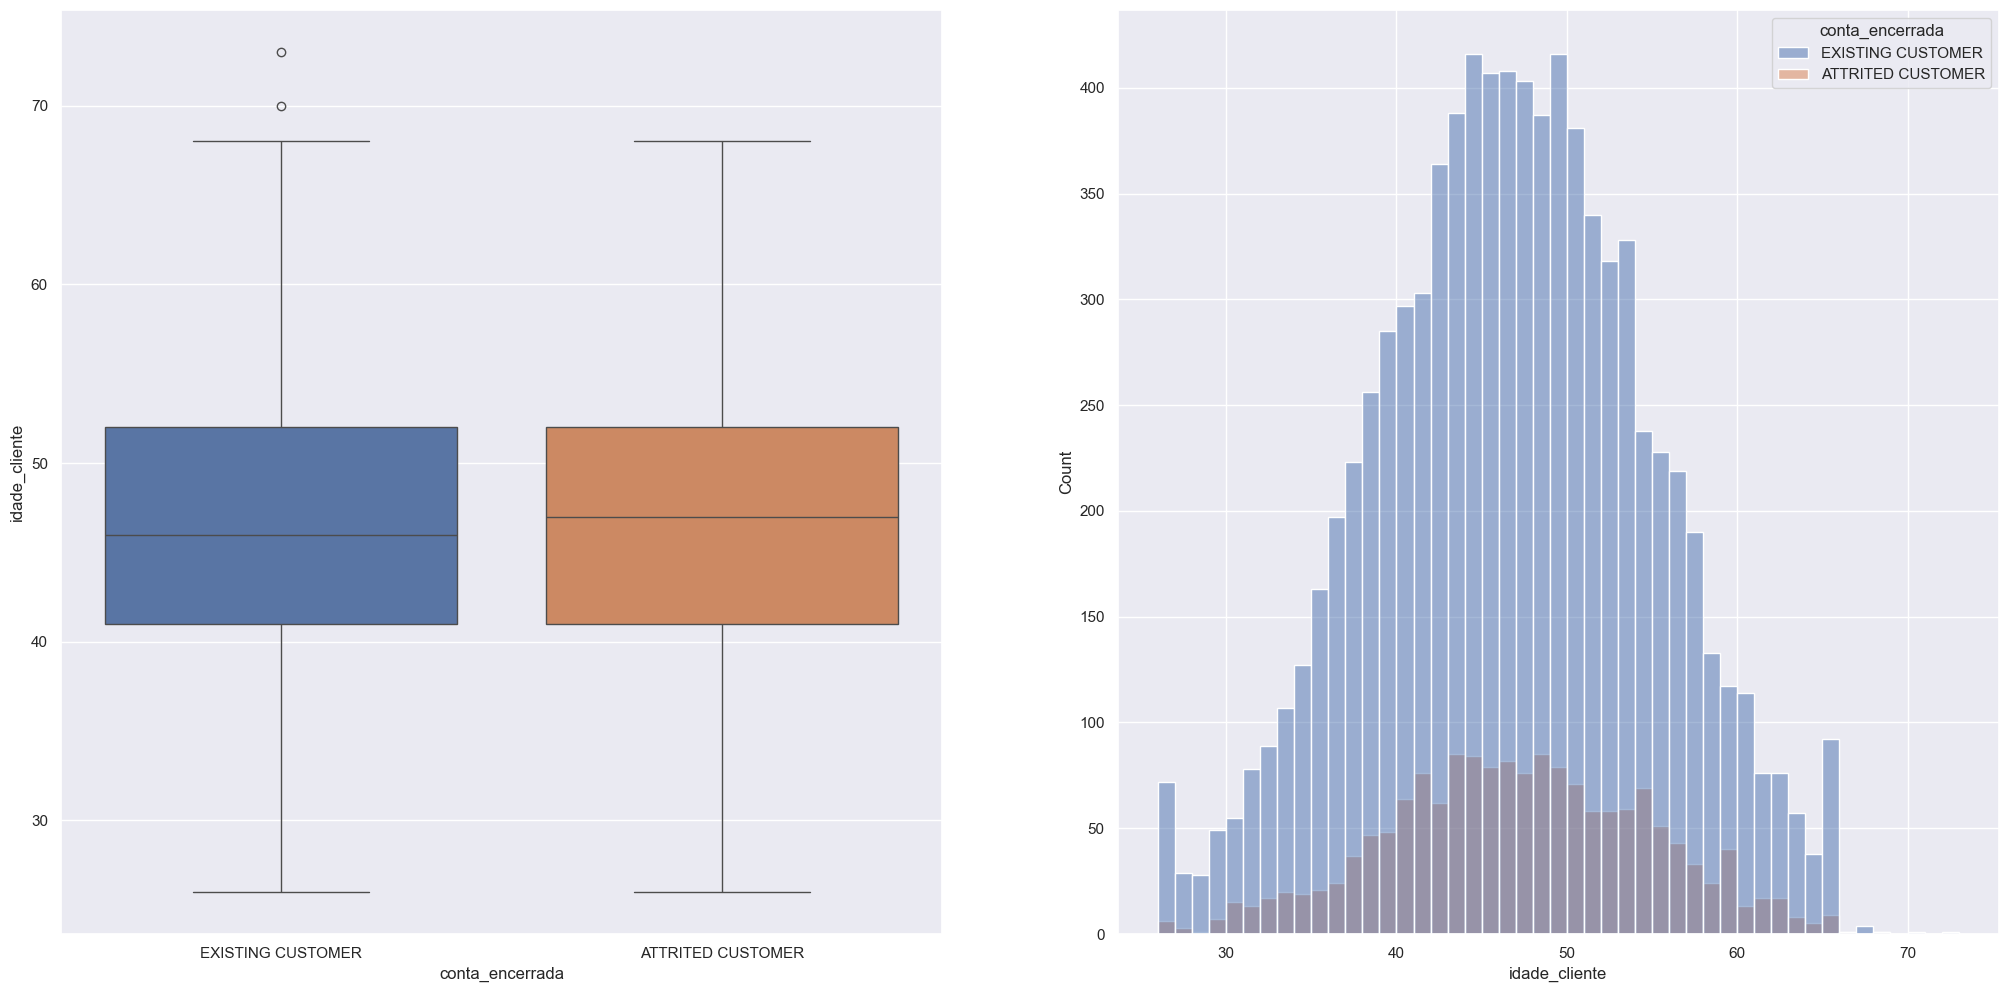

In [33]:
# Definindo Grid
pyplot.subplot(1,2,1) 

# Verificação Boxplot
sns.boxplot(x='conta_encerrada', y='idade_cliente', hue='conta_encerrada', data=df_4);

# Definindo Segundo Grid
pyplot.subplot(1,2,2)

# Verificação Dsitribuição
sns.histplot(data=df_4, x='idade_cliente', hue='conta_encerrada');

**Atributo - Gênero**

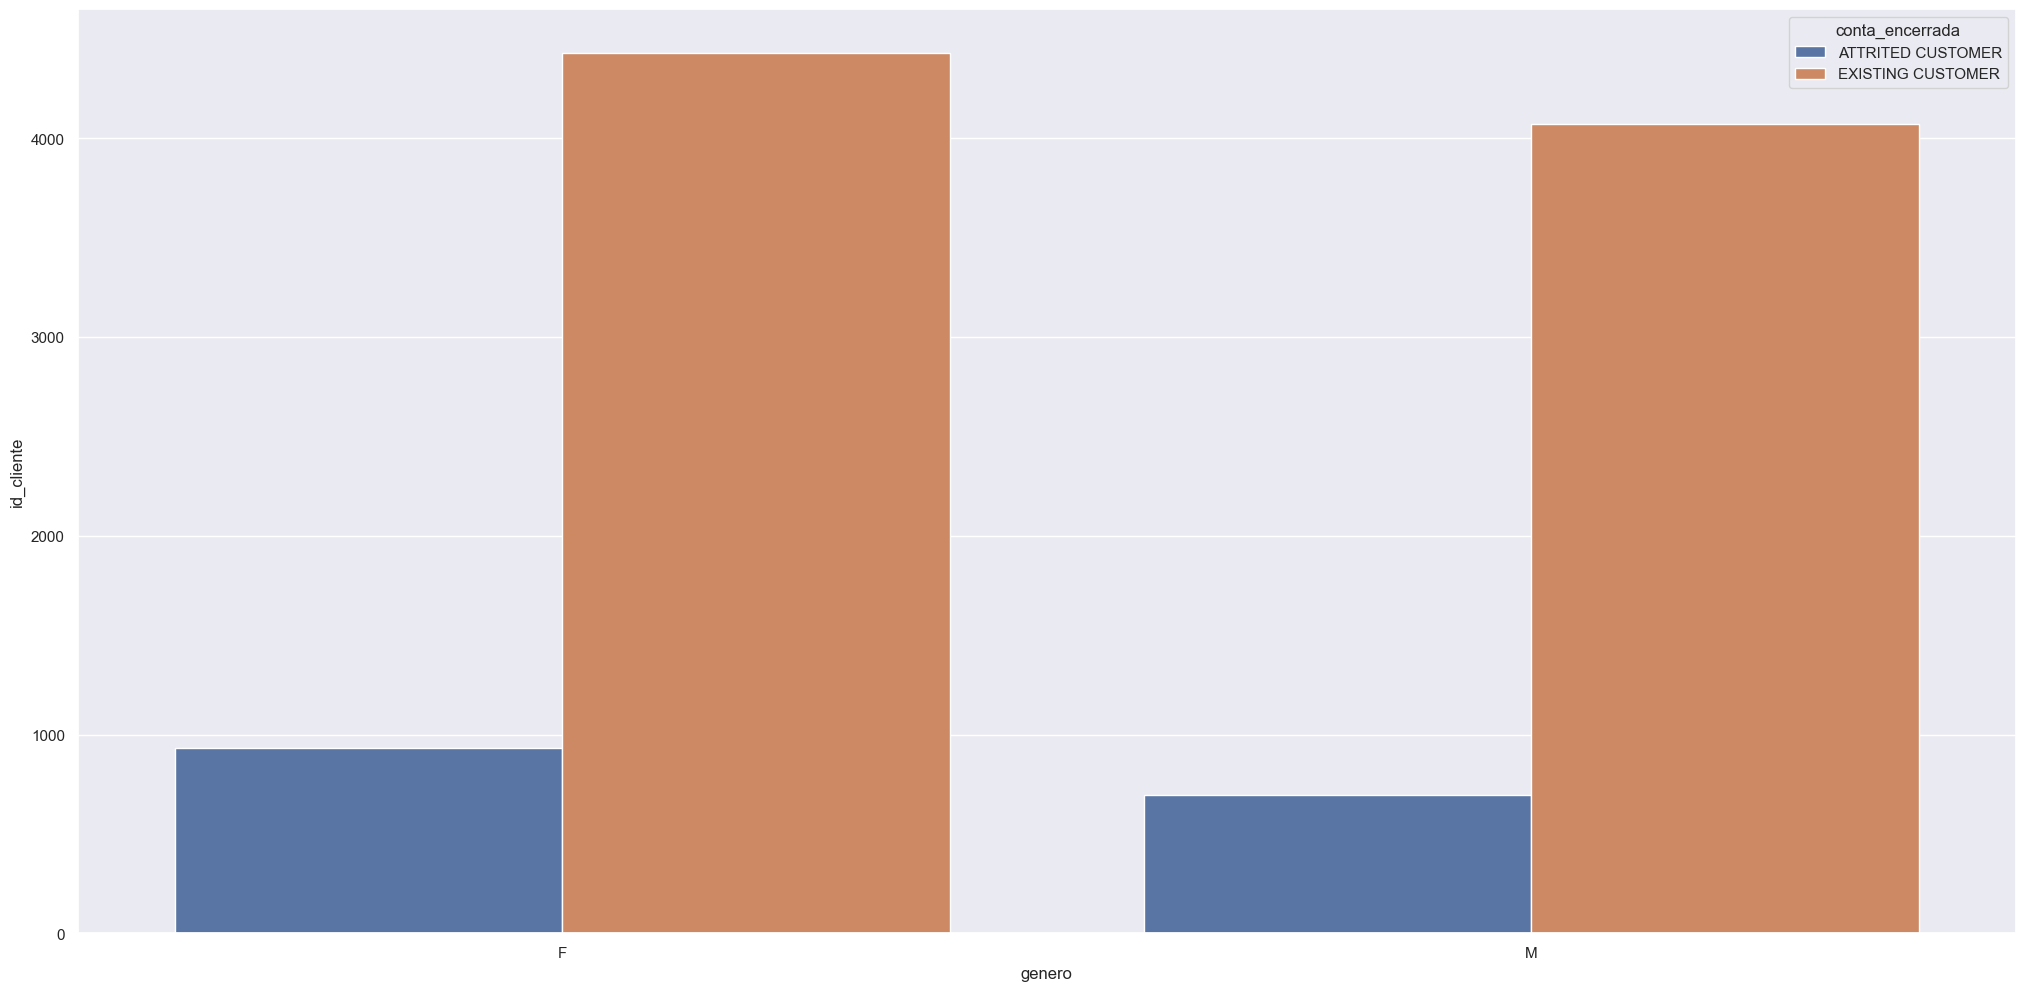

In [40]:
# Criando dataset
df_genero = df_4[['id_cliente', 'genero', 'conta_encerrada']].groupby(['genero', 'conta_encerrada']).count().reset_index().copy()

# Visualização
sns.barplot(data=df_genero, x='genero', y='id_cliente', hue='conta_encerrada');